## Week 3 Visualization: Case Study  1: Bank Loan Dataset
* Thera Bank customer database is used for this study

### Attributes Data descriptor

* Attribute 1: Customer ID for each of the customers sampled
* Attribute 2: Customer age in completed years (rounded off to nearest integer)
* Attribute 3: Yrs of professional experience (rounded off to nearest integer)
* Attribute 4: Income in (K-USD)
* Attribute 5: Zip code for home address of customer
* Attribute 6: Family size of customer
* Attribute 7: CCAvg - Avg. credit card spending per month (K-USD)
* Attribute 8: Education level (1-UG, 2-Grad, 3-Adv/Pro)
* Attribute 9: Value of house mortgage (K-USD)- if availed - else 0
* Target Variable 10: Personal Loan (Binary classification - Y/N - 1/0)
* Attribute 11: Securities account exists for customer(Y/N) - Binary (1/0)
* Attribute 12: CD account exists for customer (Y/N) - Binary (1/0)
* Attribute 13: Customer uses online or not (Y/N)- Binary (1/0)
* Attribute 14: Does the customer use Universal bank credit card (Y/N- 1/0)

### Objective: To build a customer profile model to target for the bank's personal loan marketing campaign

In [1]:
# import libraries and other commands for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns # for statistical plots
%matplotlib inline
#
# Print output for every line of code
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Python Course'

### Read Bank customer data as dataframe

In [5]:
bank_df=pd.read_csv(f"{path}/Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Basic EDA

In [6]:
print("Bank dataframe Shape:", bank_df.shape,'\n');
bank_df.info();
bank_df.describe().T

Bank dataframe Shape: (5000, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
bank_df.rename(columns ={'ID':'Cust_ID','Family':'Fam_size','Education':'Edu_level'},inplace=True)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


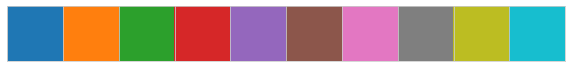

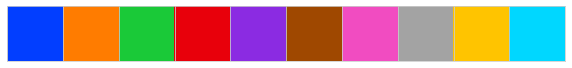

In [ ]:
palette = sns.color_palette() # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
sns.palplot(sns.color_palette('bright', 10)) # Seaborn color palette, with 10 colors
#sns.color_palette("ocean", as_cmap=True) # Get a CMap

## Univariate Plots

Text(0, 0.5, 'Frequency')

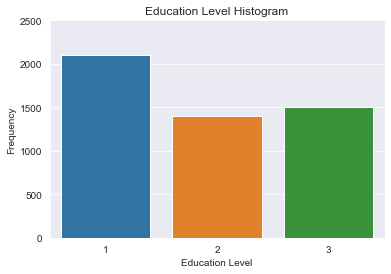

In [ ]:
sns.countplot(data=bank_df, x='Edu_level')
plt.title('Education Level Histogram')
#plt.xlim(0,3)
plt.ylim(0,2500)
plt.xlabel('Education Level')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Income', ylabel='Count'>

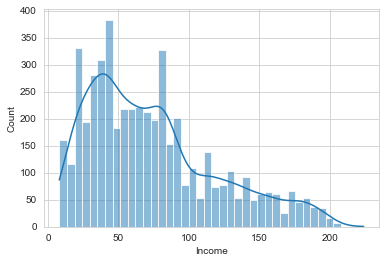

In [ ]:
sns.histplot(data=bank_df, x='Income',bins=40, kde=True)

Text(0, 0.5, 'Frequency')

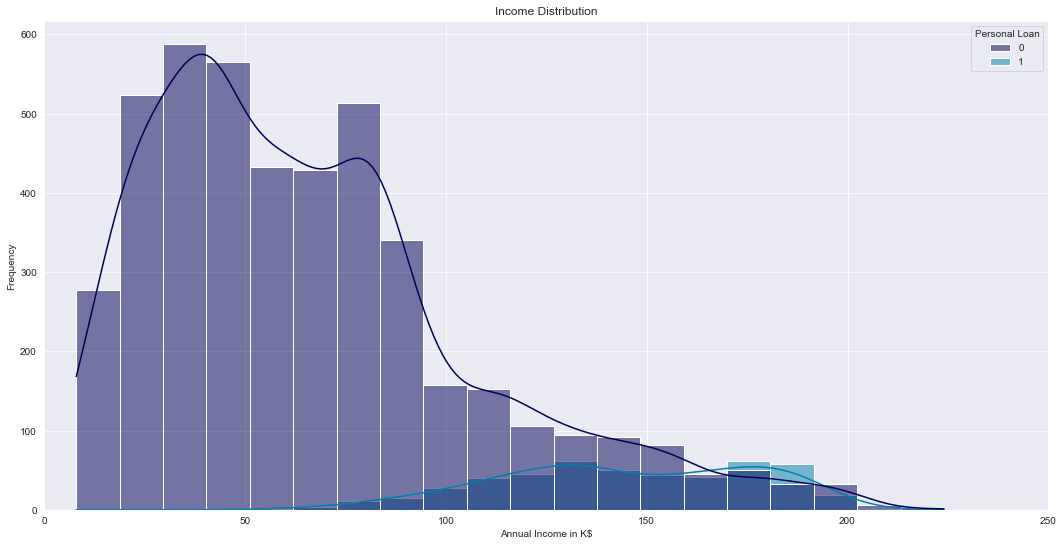

In [ ]:
plt.figure(figsize=(18,9))
sns.histplot(data=bank_df, x='Income', hue='Personal Loan',kde=True, bins=20,palette='ocean')
plt.title('Income Distribution')
plt.xlim(0,250)
plt.xlabel('Annual Income in K$')
plt.ylabel('Frequency')

Text(0.5, 0, 'Education_Level')

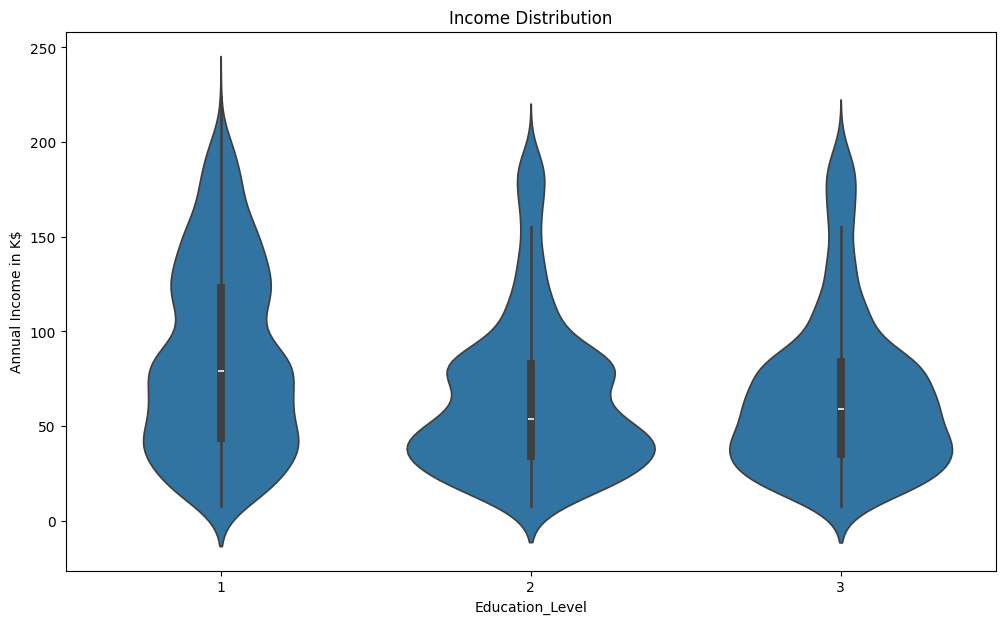

In [9]:
plt.figure(figsize=(12,7))
sns.violinplot(data=bank_df, x='Edu_level',y='Income', orient ='v')
plt.title('Income Distribution')
#plt.xlim(0,250)
plt.ylabel('Annual Income in K$')
plt.xlabel('Education_Level')

Text(0.5, 0, 'Education_Level')

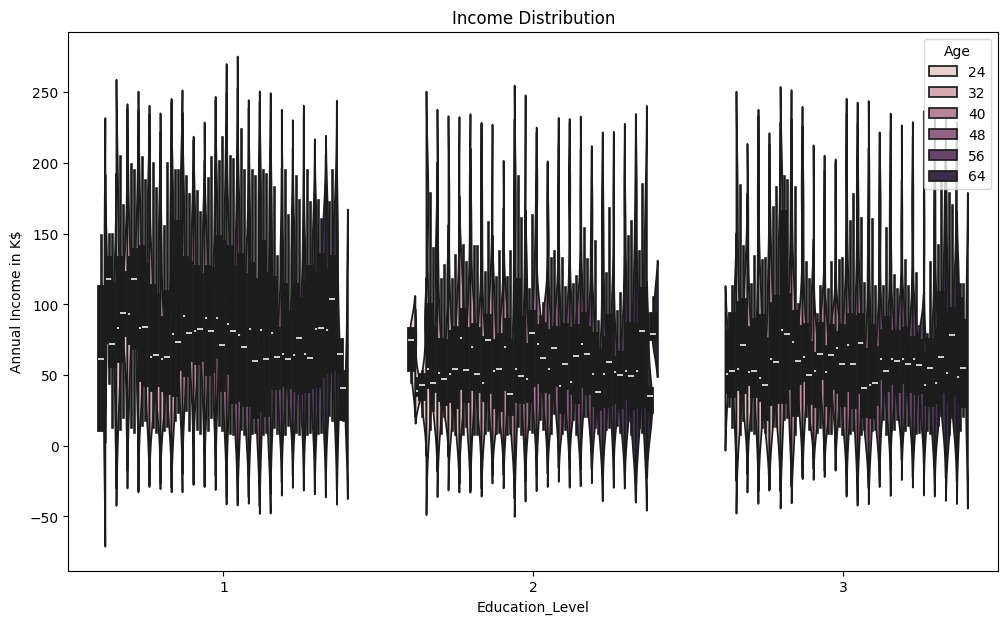

In [13]:
plt.figure(figsize=(12,7))
sns.violinplot(data=bank_df, x='Edu_level',y='Income', orient ='v',split=True,hue='Age')
plt.title('Income Distribution')
#plt.xlim(0,250)
plt.ylabel('Annual Income in K$')
plt.xlabel('Education_Level')

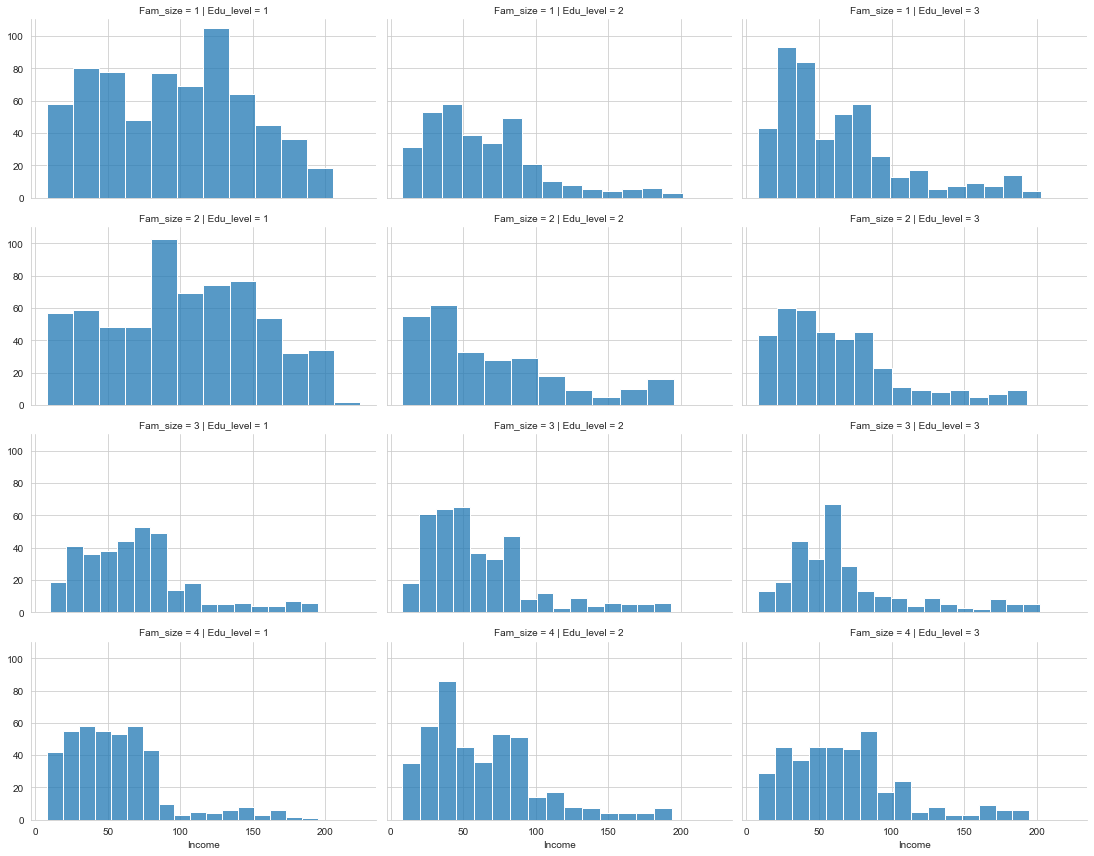

In [ ]:
#plt.figure(figsize=(18,18))
g=sns.FacetGrid(bank_df,col='Edu_level', row='Fam_size',sharey=True, height=3, aspect=1.7)
g.map(sns.histplot,'Income')

<Axes: xlabel='Income', ylabel='Edu_level'>

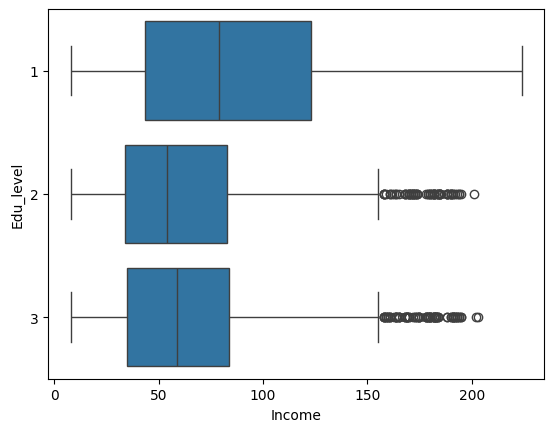

In [14]:
sns.boxplot(data=bank_df,x='Income',y='Edu_level',orient= "h")

In [ ]:
# separate the two sets
cat_cols = ['Edu_level','Personal Loan','Securities Account','CD Account','Online','CreditCard']
num_cols = ['Age','Experience','Income','Fam_size','CCAvg']
#
# plot countplots for categorical variables
fig, ax = plt.subplots(6,2,figsize=(9,27));
ax=ax.flatten();
j=0

for i in cat_cols:
    sns.countplot(bank_df[i],ax=ax[j]);
    bank_df[i].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[j+1]);
    j+=2

In [ ]:
pd.crosstab(bank_df['Education'],bank_df['Personal Loan'])

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


In [ ]:
pd.crosstab(bank_df['Online'],bank_df['Personal Loan'],values=bank_df.Income.round(2),aggfunc='mean')

Personal Loan,0,1
Online,,
0,65.858785,141.804233
1,66.494244,146.656357


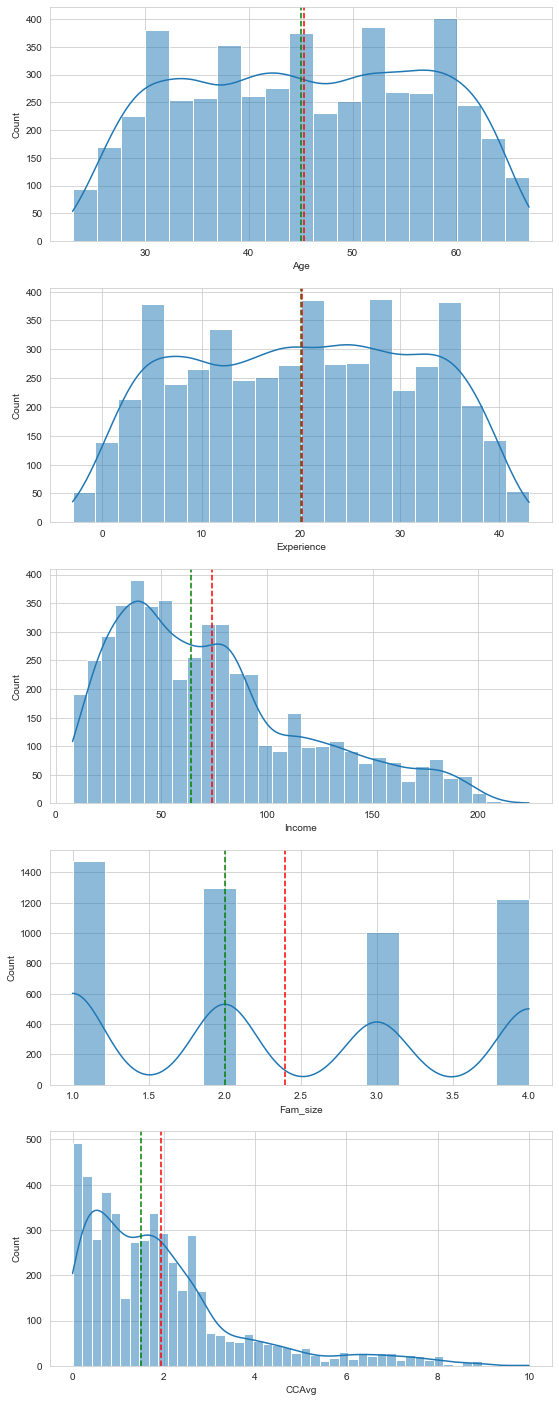

In [ ]:
# plot histplots for numerical variables
fig, ax = plt.subplots(5,1,figsize=(9,25));
ax=ax.flatten();
j=0

for i in num_cols:
    sns.histplot(bank_df[i],ax=ax[j], kde=True);
    ax[j].axvline(bank_df[i].median(),ls='--',c="g");
    ax[j].axvline(bank_df[i].mean(),ls='--',c="r");
    j+=1
    #sns.violinplot(bank_df[i],ax=ax[j]);

## Bivariate Plots

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

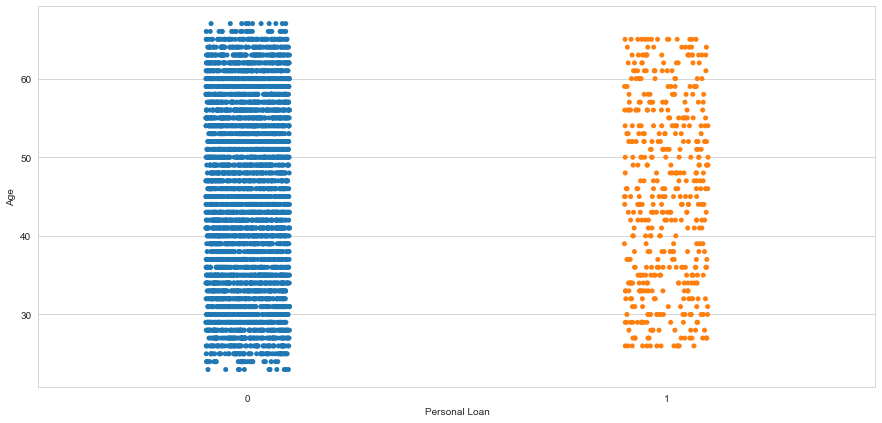

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(data=bank_df,x='Personal Loan',y='Age',jitter=True)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

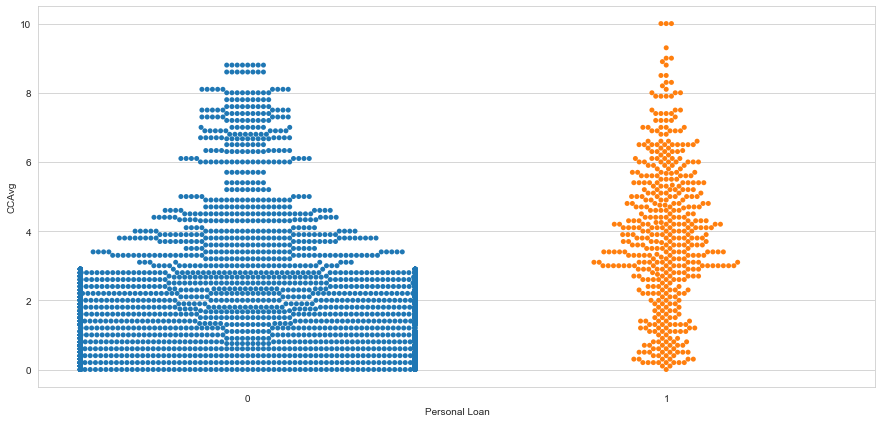

In [ ]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=bank_df, x='Personal Loan',y='CCAvg')

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

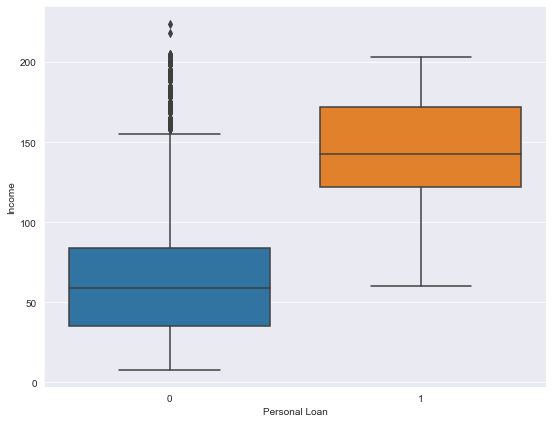

In [ ]:
plt.figure(figsize=(9,7))
sns.set_style("darkgrid")
sns.boxplot(x=bank_df['Personal Loan'],y=bank_df['Income'])


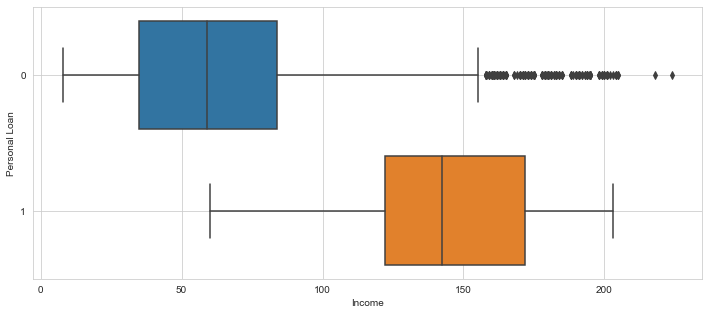

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='Personal Loan',x='Income',data=bank_df,orient='h')
plt.grid(axis='y')

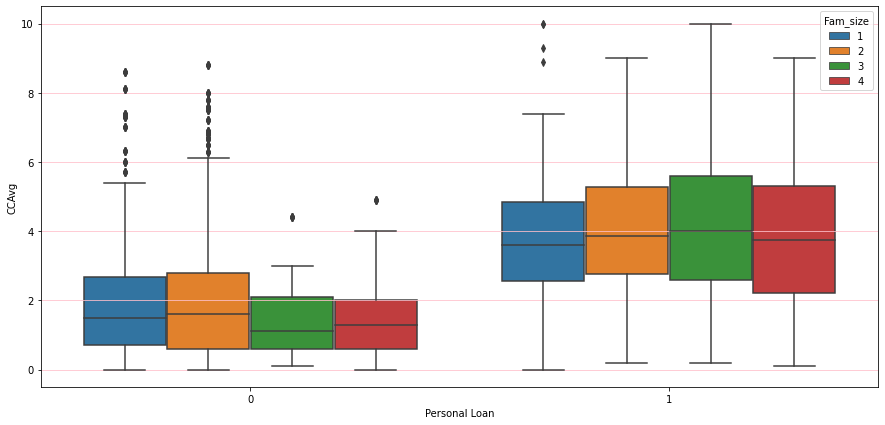

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(bank_df['Personal Loan'],bank_df['CCAvg'],hue=bank_df['Fam_size'])
plt.grid(axis='y',color='pink')

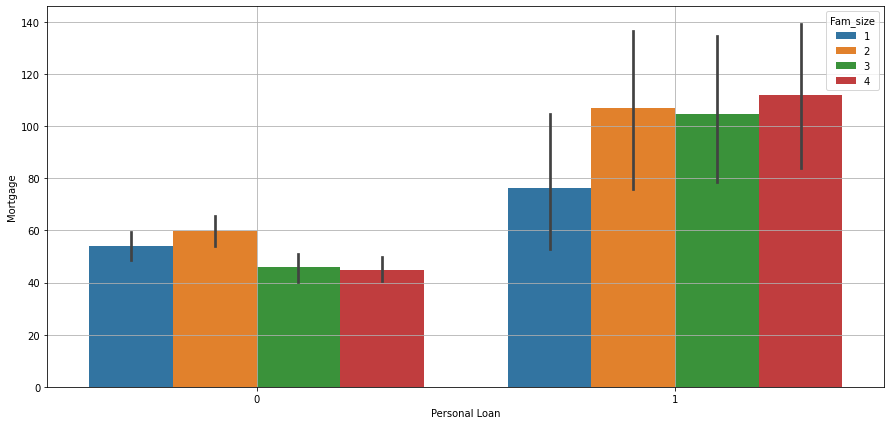

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(bank_df['Personal Loan'],bank_df['Mortgage'],hue=bank_df['Fam_size'])
plt.grid()

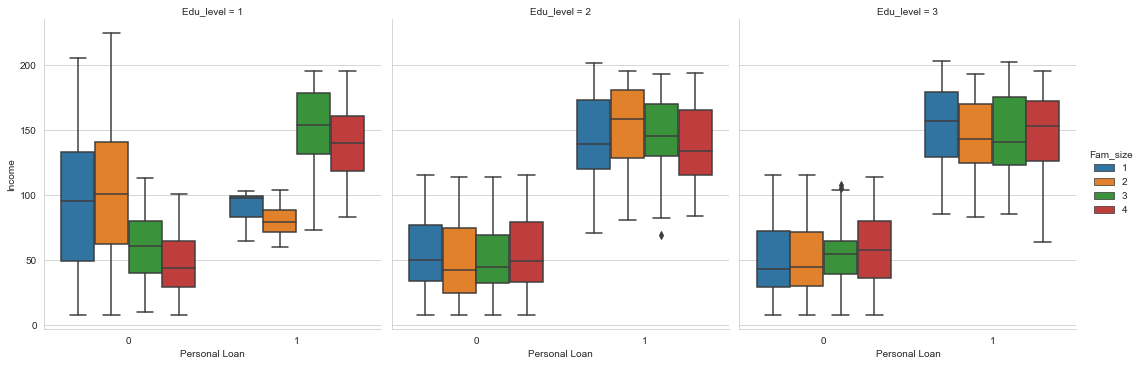

In [ ]:
sns.set_style("whitegrid")
sns.catplot(x='Personal Loan',y='Income',hue='Fam_size',col='Edu_level',data=bank_df,kind='box')

<AxesSubplot:xlabel='Income', ylabel='Age'>

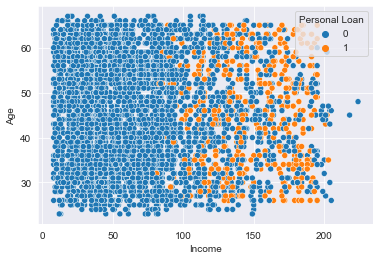

In [ ]:
sns.scatterplot(x='Income',y='Age',data=bank_df,hue='Personal Loan')

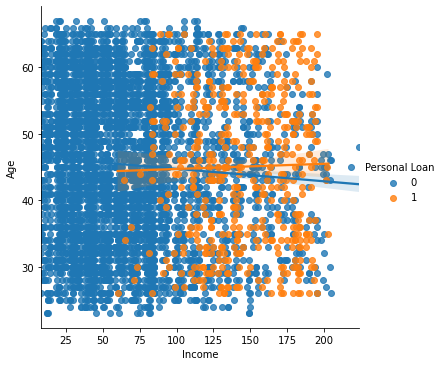

In [ ]:
sns.lmplot(x='Income',y='Age',data=bank_df,hue='Personal Loan')

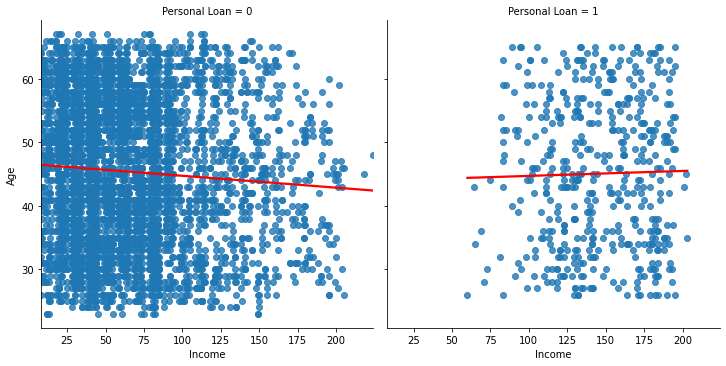

In [ ]:
sns.lmplot(data=bank_df,x='Income',y='Age',col='Personal Loan',ci=False,markers='o',line_kws={'color': 'red'})

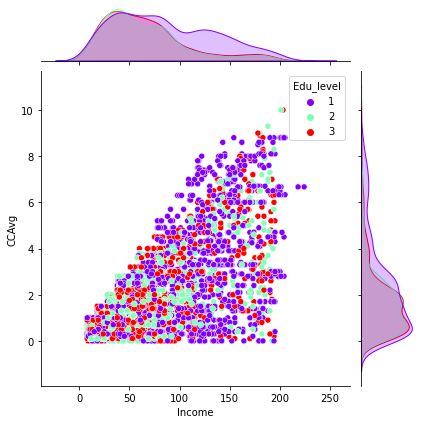

In [ ]:
sns.jointplot(data=bank_df,x='Income',y='CCAvg',hue='Edu_level',palette='rainbow')

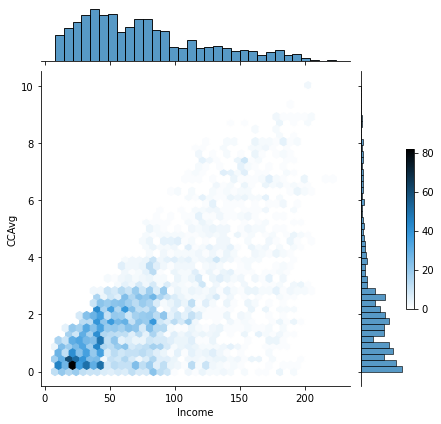

In [ ]:
sns.jointplot(data=bank_df,x='Income',y='CCAvg',kind="hex")
plt.colorbar();

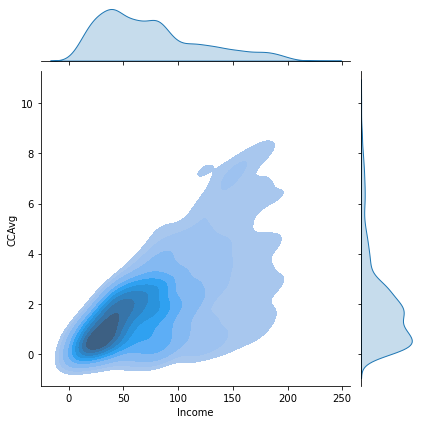

In [ ]:
sns.jointplot(data=bank_df,x='Income',y='CCAvg',kind="kde", fill=True)

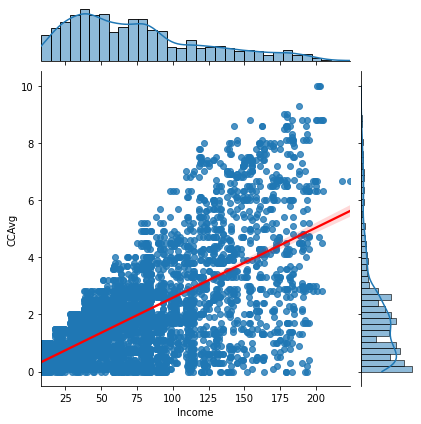

In [ ]:
sns.jointplot(data=bank_df,x='Income',y='CCAvg',kind="reg",line_kws={'color': 'red'})

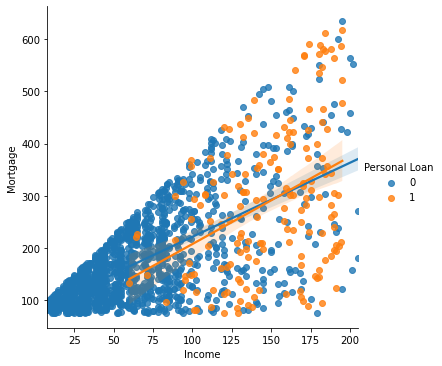

In [ ]:
temp=bank_df[bank_df['Mortgage']>0]
sns.lmplot(x='Income',y='Mortgage',data=temp,hue='Personal Loan', ci=95.)

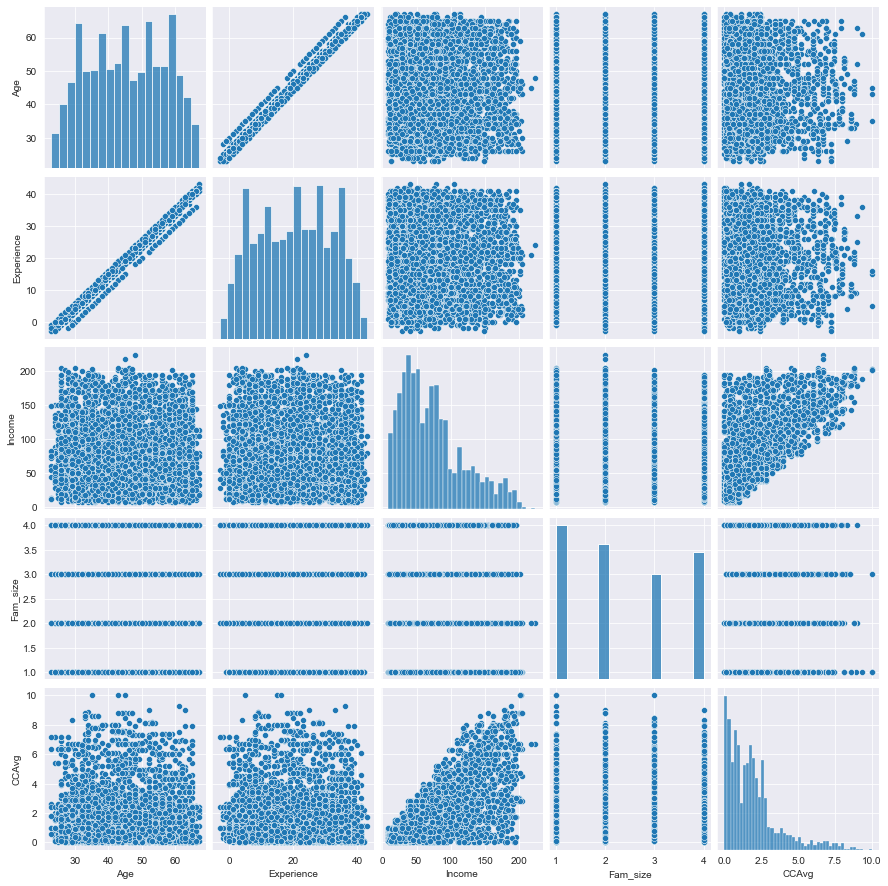

In [ ]:
sns.pairplot(bank_df[num_cols],kind='scatter')

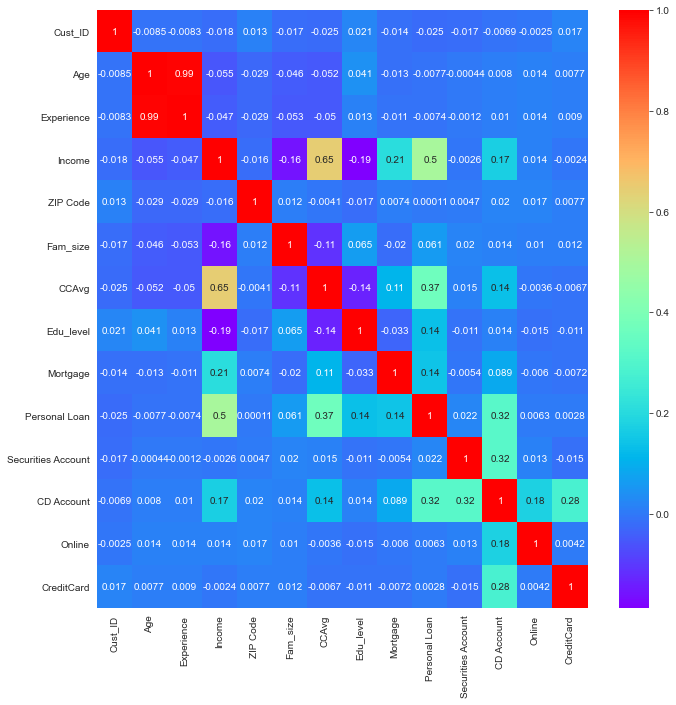

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(bank_df.corr(),cmap='rainbow',annot=True);

In [ ]:
bank_geo=bank_df.groupby(by='ZIP Code',axis=0)
bank_geo_avg=bank_geo.mean()
bank_geo_avg.sort_values(by='Age',ascending=False)

,Cust_ID,Age,Experience,Income,Fam_size,CCAvg,Edu_level,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ZIP Code,,,,,,,,,,,,,
92694,3024.00,63.000000,37.000000,105.000000,4.000000,1.700000,3.00,244.000000,0.00,0.0,0.00,0.000000,1.000000
91207,2631.00,61.500000,36.000000,30.500000,1.500000,1.000000,2.00,61.500000,0.00,0.0,0.00,1.000000,0.500000
91326,751.50,60.000000,35.500000,142.000000,1.000000,4.150000,1.00,183.000000,0.00,0.0,0.00,1.000000,0.000000
94965,2655.00,60.000000,36.000000,49.000000,4.000000,2.200000,1.00,204.000000,0.00,1.0,0.00,1.000000,0.000000
93003,3923.75,57.500000,32.750000,67.500000,3.250000,1.550000,2.75,54.750000,0.25,0.0,0.25,0.750000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92161,2531.00,30.500000,2.500000,51.500000,4.000000,1.550000,3.00,0.000000,0.00,0.0,0.00,0.500000,0.000000
95045,2922.40,30.000000,3.200000,52.800000,3.600000,1.960000,2.60,38.400000,0.00,0.2,0.00,0.800000,0.200000
94566,2633.00,29.666667,4.666667,76.333333,1.666667,1.566667,2.00,106.333333,0.00,0.0,0.00,0.666667,0.333333


In [ ]:
bank_geo_avg

,Cust_ID,Age,Experience,Income,Fam_size,CCAvg,Edu_level,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ZIP Code,,,,,,,,,,,,,
9307,385.000000,51.000000,25.000000,21.000000,4.000000,0.600000,3.000000,0.000,0.0,0.000,0.0,1.000000,1.000000
90005,1922.400000,40.600000,16.400000,66.200000,2.400000,1.926000,1.600000,16.200,0.0,0.000,0.0,0.600000,0.200000
90007,2377.166667,53.833333,29.166667,71.333333,2.833333,2.666667,1.333333,70.000,0.0,0.000,0.0,0.666667,0.333333
90009,2662.750000,49.125000,24.125000,92.375000,2.625000,2.150000,1.750000,21.625,0.0,0.125,0.0,0.500000,0.125000
90011,1944.000000,51.000000,26.333333,52.666667,2.666667,0.866667,2.000000,83.000,0.0,0.000,0.0,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,2181.000000,46.250000,21.000000,70.250000,3.000000,2.350000,2.250000,0.000,0.0,0.000,0.0,0.500000,0.000000
96094,4269.500000,31.500000,5.500000,59.000000,3.000000,1.000000,2.000000,0.000,0.0,0.000,0.0,1.000000,0.000000
96145,3607.000000,43.000000,18.000000,9.000000,2.000000,0.000000,3.000000,96.000,0.0,0.000,0.0,1.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

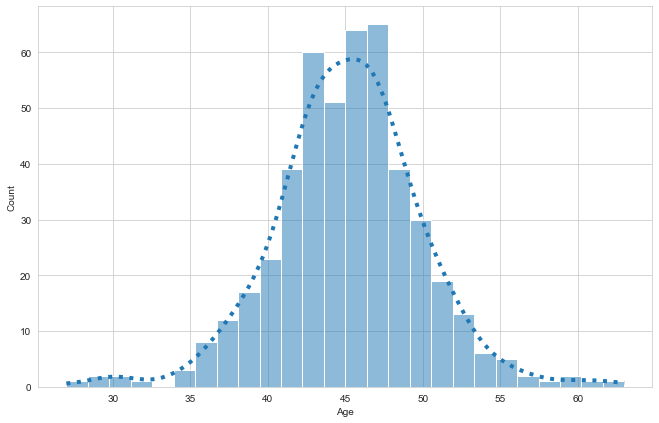

In [ ]:
plt.figure(figsize=(11,7))
sns.histplot(data=bank_geo_avg, x='Age', kde=True, line_kws={'color': 'crimson', 'lw': 4, 'ls': ':'})

<AxesSubplot:xlabel='Age', ylabel='Density'>

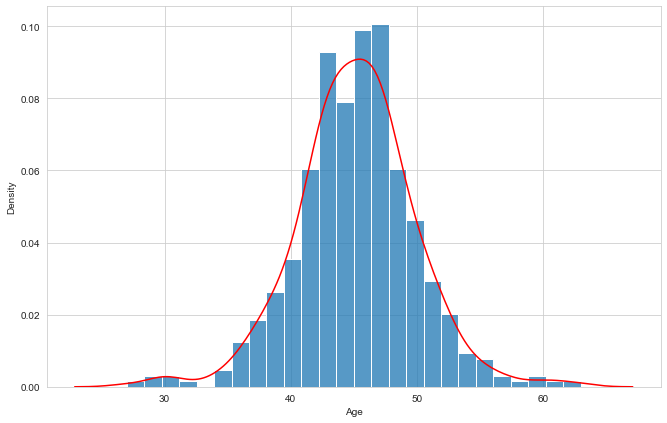

In [ ]:
plt.figure(figsize=(11,7))
ax=sns.histplot(data=bank_geo_avg, x='Age', stat='density')
sns.kdeplot(data=bank_geo_avg, x='Age',color='red',ax=ax)

In [ ]:
#
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#

In [ ]:
fig_3D=px.scatter_3d(bank_df,x='Age',y='Income',z='CCAvg',color='Age')
fig_3D.show()

In [ ]:
fig_3D.write_html("Bankloan3D_scatter.html")

## Case Study 2 : IPL Dataset

**Domain:** SPORTS MANAGEMENT

<b>Context:</b> Company IMG-Reliance is a sports management company for international cricket.

<b>Data Description:</b>The data is collected belongs to batsman from 2021 IPL season

**Attribute Information:** <br>

1. **Runs**: Runs score by the batsman
2. **Ave**: Average runs scored by the batsman per match
3. **SR**: strike rate of the batsman
4. **Fours**: number of boundary/four scored
5. **Six**: number of boundary/six scored
6. **HF**: number of half centuries scored so far

### **Objective:** Goal is to build a data driven batsman ranking model for IMG-Reliance Marketing Department

In [ ]:
# Import Plotly also
import plotly.express as px

In [ ]:
# load the data and check first 10 entries
ipl = pd.read_csv('IPL2021_batsmen.csv')
ipl.head(10)

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,AB de Villiers,15,14,4,313,76*,31.3,211,148.34,0,2,23,16
1,Abdul Samad,11,10,1,111,28,12.33,87,127.58,0,0,4,8
2,Abhishek Sharma,8,7,1,98,33,16.33,75,130.66,0,0,7,4
3,Adam Milne,4,3,1,16,15,8,17,94.11,0,0,0,1
4,Aiden Markram,6,6,1,146,42,29.2,119,122.68,0,0,12,4
5,Ajinkya Rahane,2,1,0,8,8,8,8,100.00,0,0,1,0
6,Ambati Rayudu,16,13,4,257,72*,28.55,170,151.17,0,2,16,17
7,Andre Russell,10,9,2,183,54,26.14,120,152.50,0,1,14,14
8,Anmolpreet Singh,1,1,0,16,16,16,14,114.28,0,0,2,1
9,Anuj Rawat,2,1,0,0,0*,0,1,0.00,0,0,0,0


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  149 non-null    object 
 1   Mat     149 non-null    int64  
 2   Inns    149 non-null    int64  
 3   NO      149 non-null    int64  
 4   Runs    149 non-null    int64  
 5   HS      149 non-null    object 
 6   Avg     149 non-null    object 
 7   BF      149 non-null    int64  
 8   SR      149 non-null    float64
 9   100     149 non-null    int64  
 10  50      149 non-null    int64  
 11  4s      149 non-null    int64  
 12  6s      149 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 15.3+ KB


In [ ]:
# check shape of the dataset
print("Shape of IPL 2021 Batsmen dataset: ",ipl.shape, "Size of IPL2021 Batsmen dataset: ", ipl.size)

Shape of IPL 2021 Batsmen dataset:  (149, 13) Size of IPL2021 Batsmen dataset:  1937


In [ ]:
temp = pd.DataFrame(ipl.HS.str.isdigit())
temp[temp['HS'] == False].count()

HS    69
dtype: int64

In [ ]:
ipl['HS']=ipl['HS'].apply(lambda x: x.split('*')[0]) # remove * from end of notout cases in HS scores
ipl = ipl.astype({"HS": np.int64}) # Convert "HS" from string to integer datatype

In [ ]:
# drop empty rows
ipl = ipl.dropna(axis=0)
ipl.head()

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,AB de Villiers,15,14,4,313,76,31.3,211,148.34,0,2,23,16
1,Abdul Samad,11,10,1,111,28,12.33,87,127.58,0,0,4,8
2,Abhishek Sharma,8,7,1,98,33,16.33,75,130.66,0,0,7,4
3,Adam Milne,4,3,1,16,15,8,17,94.11,0,0,0,1
4,Aiden Markram,6,6,1,146,42,29.2,119,122.68,0,0,12,4


## **EDA:** Exploratory Data Analysis

In [ ]:
# check shape of the dataset
print("Shape of IPL dataset: ",ipl.shape, "Size of IPL dataset: ", ipl.size)

Shape of IPL dataset:  (149, 13) Size of IPL dataset:  1937


In [ ]:
# check data type
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  149 non-null    object 
 1   Mat     149 non-null    int64  
 2   Inns    149 non-null    int64  
 3   NO      149 non-null    int64  
 4   Runs    149 non-null    int64  
 5   HS      149 non-null    int64  
 6   Avg     149 non-null    object 
 7   BF      149 non-null    int64  
 8   SR      149 non-null    float64
 9   100     149 non-null    int64  
 10  50      149 non-null    int64  
 11  4s      149 non-null    int64  
 12  6s      149 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 16.3+ KB


In [ ]:
ipl.drop(ipl[ipl['Avg']=='-'].index,inplace=True) # drop rows where averages are not available
ipl = ipl.astype({"Avg": np.float64})

In [ ]:
# check for duplicates
print("No. of duplicate rows: ", ipl[ipl.duplicated(keep=False)].shape[0])

No. of duplicate rows:  0


In [ ]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 148
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  147 non-null    object 
 1   Mat     147 non-null    int64  
 2   Inns    147 non-null    int64  
 3   NO      147 non-null    int64  
 4   Runs    147 non-null    int64  
 5   HS      147 non-null    int64  
 6   Avg     147 non-null    float64
 7   BF      147 non-null    int64  
 8   SR      147 non-null    float64
 9   100     147 non-null    int64  
 10  50      147 non-null    int64  
 11  4s      147 non-null    int64  
 12  6s      147 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 16.1+ KB


In [ ]:
# check 5-pt summary
ipl.describe()

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,8.591837,6.312925,1.442177,120.448980,32.938776,17.500680,94.829932,105.464558,0.027211,0.605442,10.523810,4.673469
std,5.122814,4.736629,1.566469,153.794302,29.998225,15.199013,114.227625,46.792401,0.163254,1.241728,15.289146,6.111031
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,0.000000,13.000000,8.000000,4.600000,13.000000,84.775000,0.000000,0.000000,0.500000,0.000000
50%,9.000000,5.000000,1.000000,55.000000,24.000000,14.550000,47.000000,113.330000,0.000000,0.000000,3.000000,2.000000
75%,14.000000,10.000000,2.000000,167.500000,55.500000,28.650000,142.000000,132.895000,0.000000,1.000000,13.500000,7.500000
max,17.000000,17.000000,9.000000,635.000000,124.000000,75.660000,471.000000,261.110000,1.000000,6.000000,64.000000,30.000000


In [ ]:
# create new column %runs in boundaries
ipl['bdr_runs_pct'] = round((ipl['4s']*4+ipl['6s']*6)/(ipl['Runs'])*100,2)
ipl.head()

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,bdr_runs_pct
0,AB de Villiers,15,14,4,313,76,31.30,211,148.34,0,2,23,16,60.06
1,Abdul Samad,11,10,1,111,28,12.33,87,127.58,0,0,4,8,57.66
2,Abhishek Sharma,8,7,1,98,33,16.33,75,130.66,0,0,7,4,53.06
3,Adam Milne,4,3,1,16,15,8.00,17,94.11,0,0,0,1,37.50
4,Aiden Markram,6,6,1,146,42,29.20,119,122.68,0,0,12,4,49.32


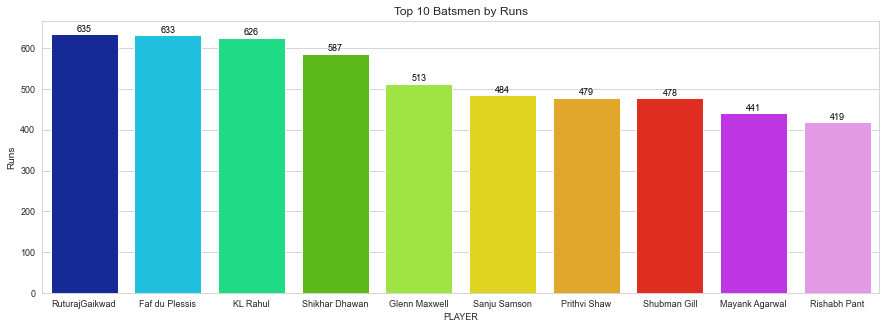

In [ ]:
# top 10 players by Runs
plt.figure(figsize=(15,5))
#fig, ax = plt.subplots(1,1,figsize=(12,10));
temp = ipl.sort_values(by='Runs',ascending = False ).head(10)
temp = temp.reset_index()

chart = sns.barplot(data= temp , x= 'PLAYER' , y ='Runs',palette ='gist_ncar');
chart.set_title("Top 10 Batsmen by Runs");
chart.set_xlabel("PLAYER",fontsize=9);
chart.tick_params(labelsize=9)
#
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
fig = px.bar(temp, x='PLAYER', y='Runs')
fig.show()
# You can hover over bars and read data

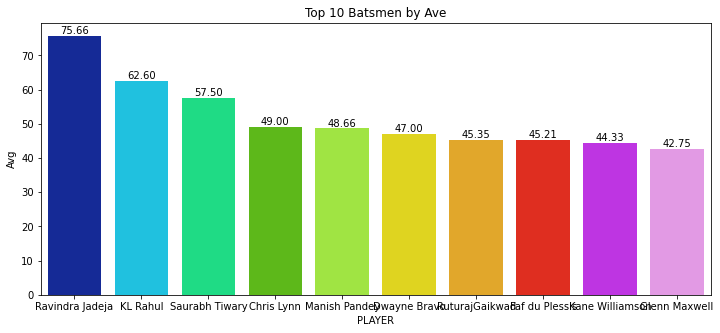

In [ ]:
# top 10 players by Ave
plt.figure(figsize=(12,5))
temp = ipl.sort_values(by='Avg',ascending = False ).head(10)
temp = temp.reset_index()
#
#
chart = sns.barplot(data= temp , x= 'PLAYER' , y ='Avg',palette ='gist_ncar');
chart.set_title("Top 10 Batsmen by Ave");
#
# annotation here
for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
ipl.columns

Index(['PLAYER', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s', '6s', 'bdr_runs_pct'],
      dtype='object')

In [ ]:
ipl.dtypes

PLAYER           object
Mat               int64
Inns              int64
NO                int64
Runs              int64
HS                int64
Avg             float64
BF                int64
SR              float64
100               int64
50                int64
4s                int64
6s                int64
bdr_runs_pct    float64
dtype: object

Index(['Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s',
       'bdr_runs_pct'],
      dtype='object')


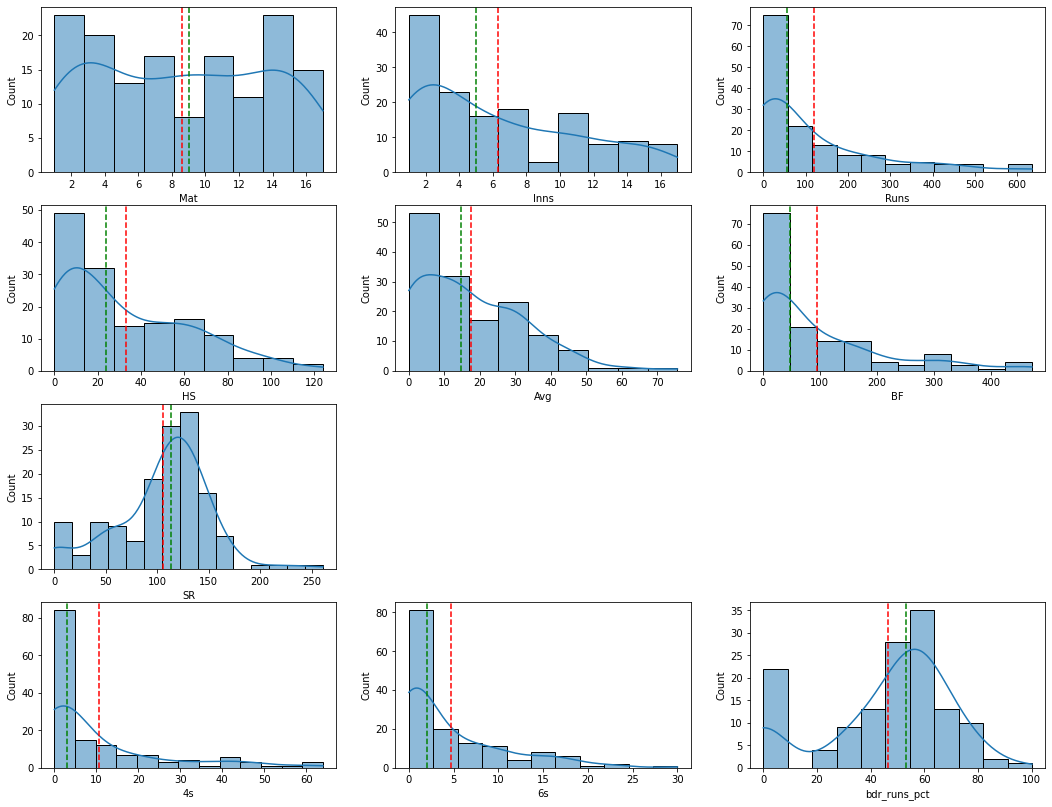

In [ ]:
#### plot histplots
fig, ax = plt.subplots(4,3,figsize=(18,14))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
ax=ax.flatten()
j=0
cols = ipl.drop(columns = ['PLAYER','NO']).columns
print(cols)
for i in cols:
    sns.histplot(ipl[i],ax=ax[j],kde=True);
    ax[j].axvline(ipl[i].median(),ls='--',c="g")
    ax[j].axvline(ipl[i].mean(),ls='--',c="r")
    j+=1

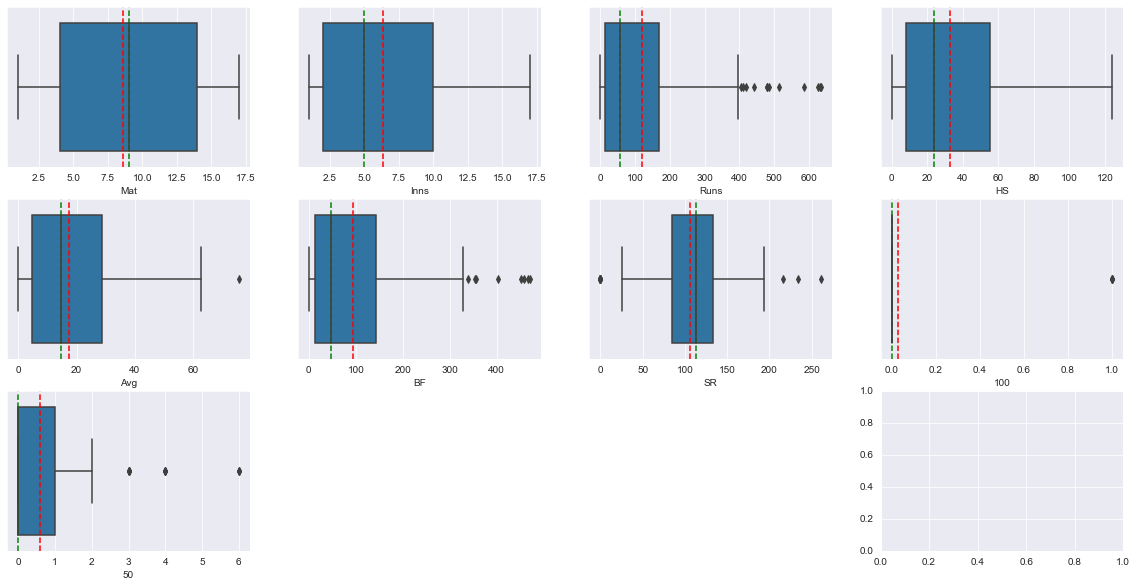

In [ ]:
# plot boxplots
fig, ax = plt.subplots(3,4,figsize=(20,10))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
ax=ax.flatten()
j=0
cols = ipl.drop(columns = ['PLAYER','NO']).columns

for i in cols:
    sns.boxplot(ipl[i],ax=ax[j]);
    ax[j].axvline(ipl[i].median(),ls='--',c="g")
    ax[j].axvline(ipl[i].mean(),ls='--',c="r")
    j+=1

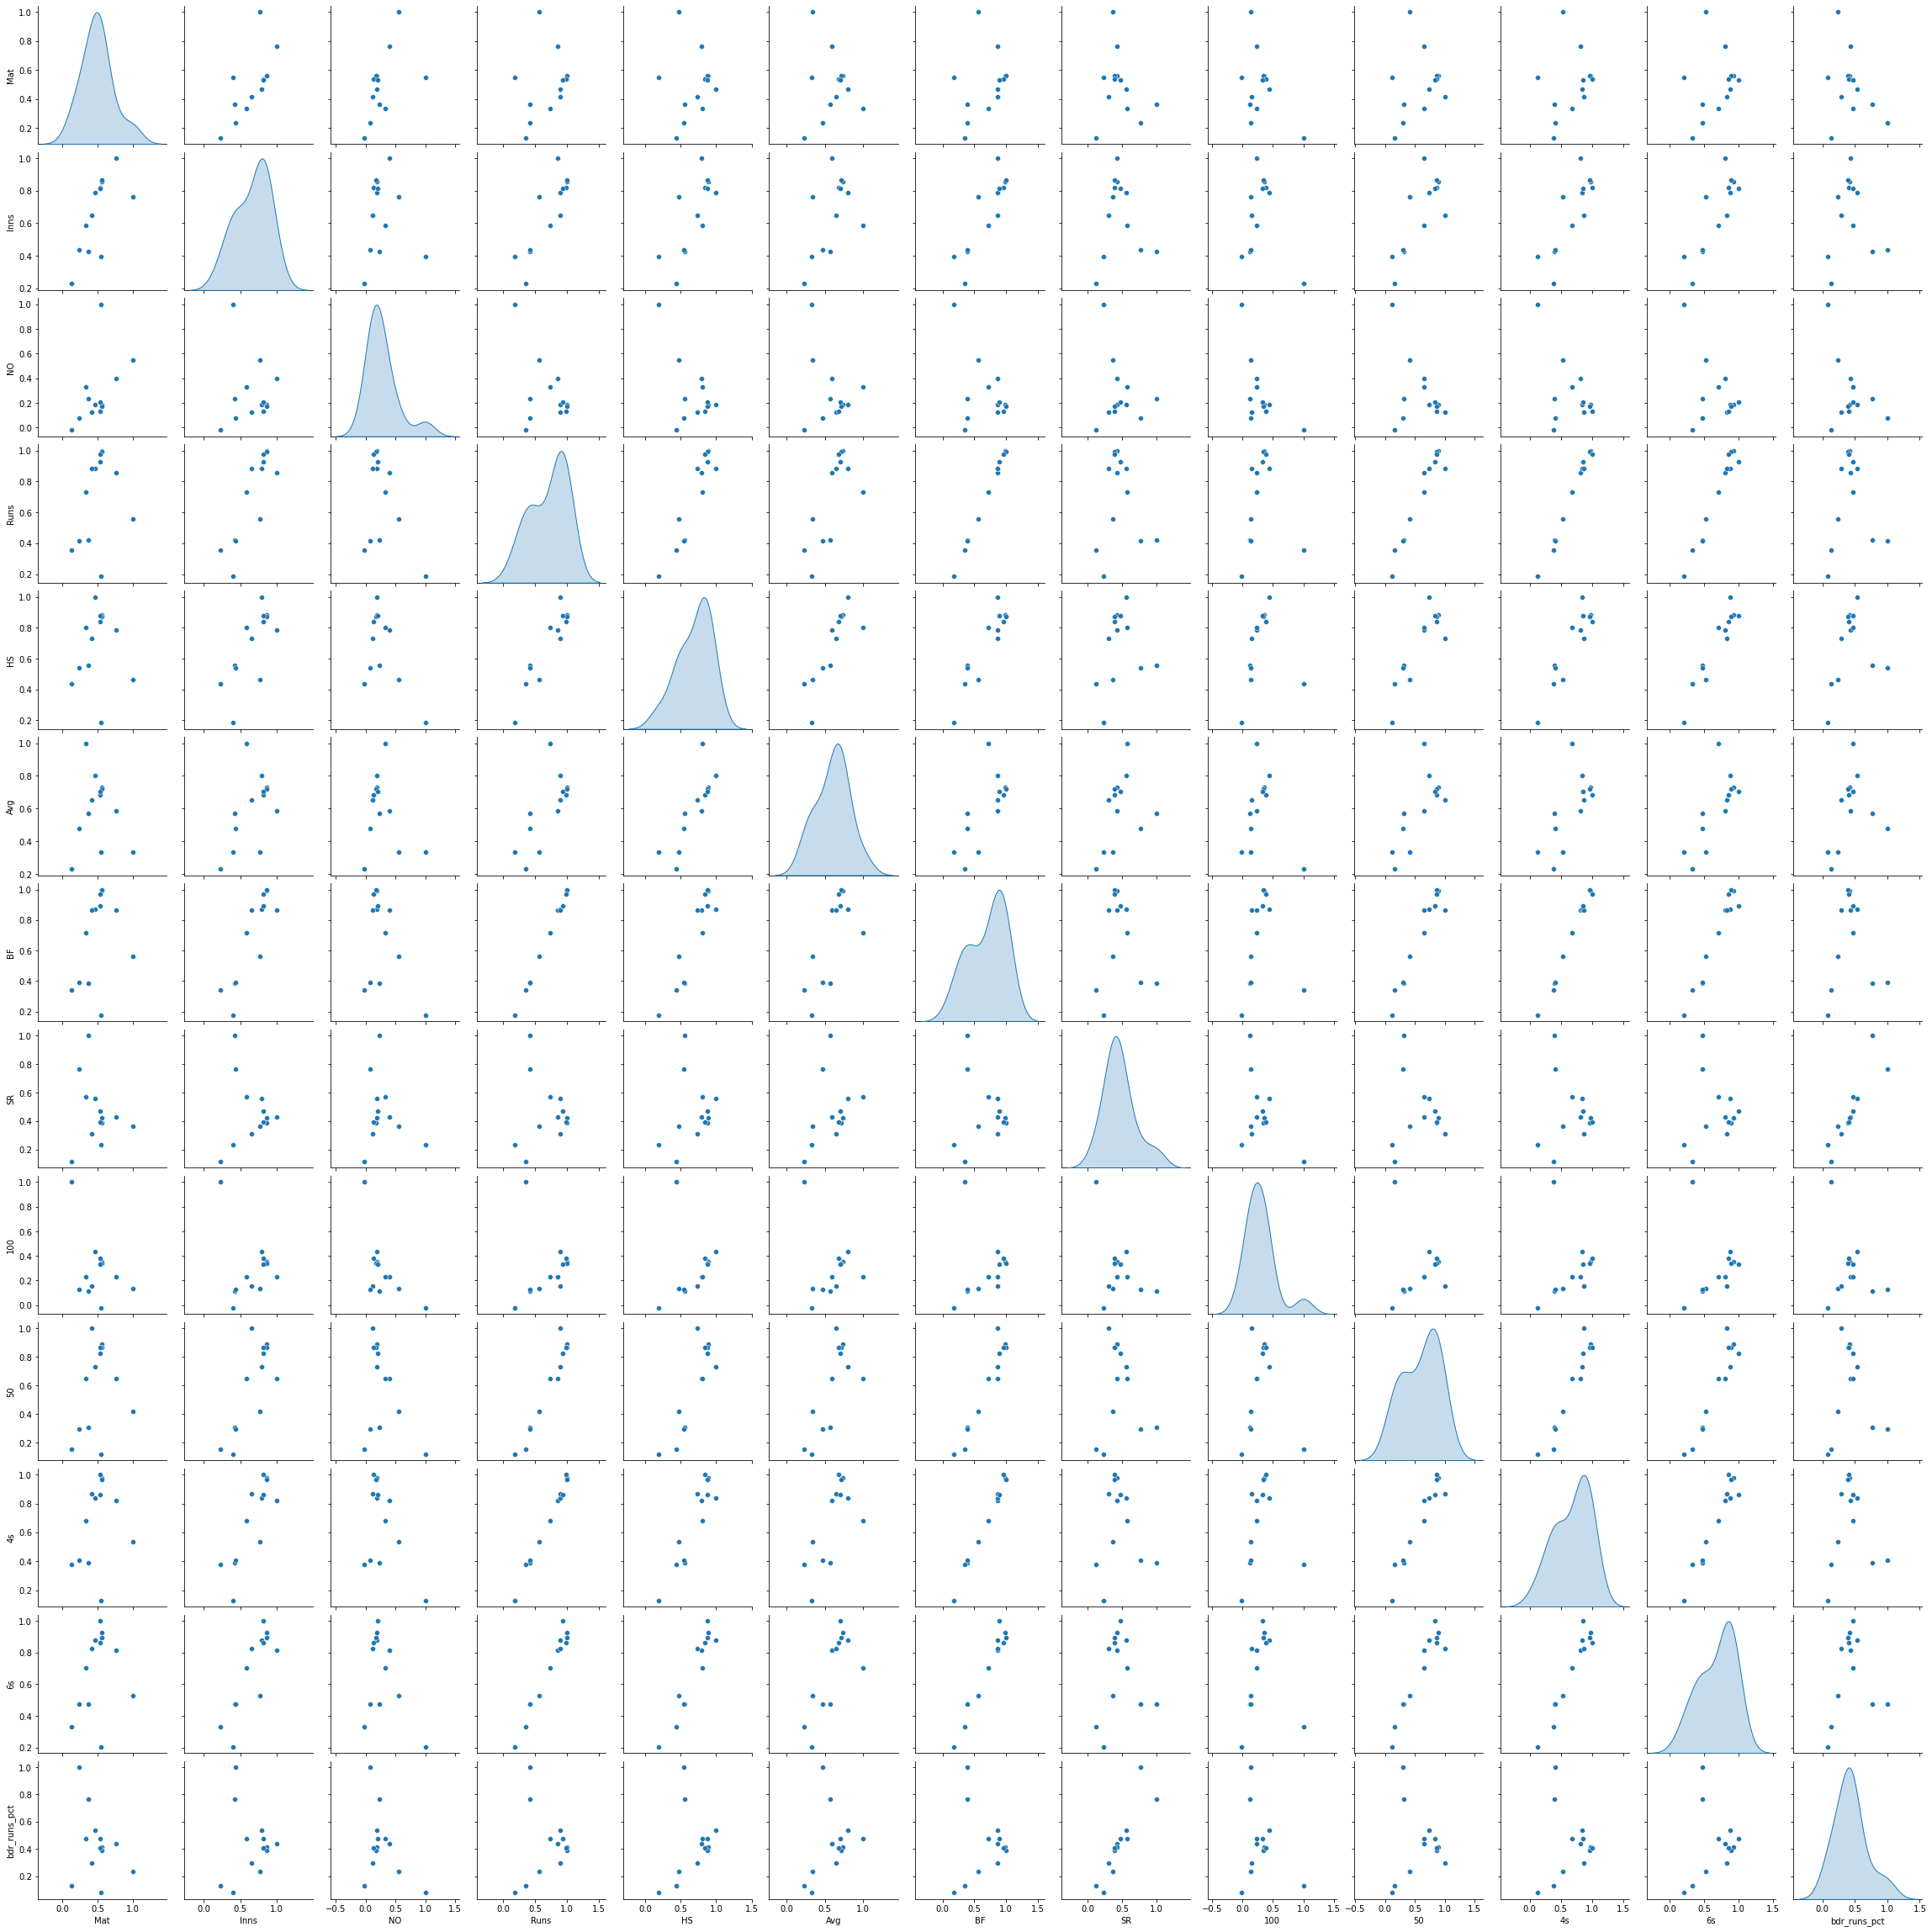

In [ ]:
# plot pairplot & heatmap
sns.pairplot(ipl.corr(),diag_kind='kde')

<AxesSubplot:>

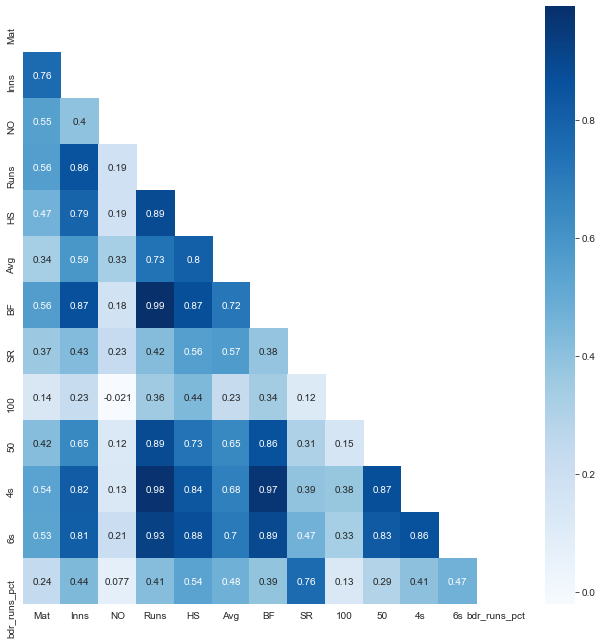

In [ ]:
# plot correlation heatmap
plt.figure(figsize=(11,11))
corr = ipl.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,annot=True, cmap = 'Blues')

### Further add your EDA studies to both case studies. Only select samples have been demonstrated